In [1]:
# Import main libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries needed for reading image and processing it
import csv
from PIL import Image
from scipy.ndimage import rotate

# Pretty display for notebooks
%matplotlib inline

### Loading Arabic Letters Dataset

In [2]:

# Training letters images and labels files
letters_training_images_file_path = "training images.zip"
letters_training_labels_file_path = "training labels.zip"
# Testing letters images and labels files
letters_testing_images_file_path = "testing images.zip"
letters_testing_labels_file_path = "testing labels.zip"

# Loading dataset into dataframes
training_letters_images = pd.read_csv(letters_training_images_file_path, compression='zip', header=None)
training_letters_labels = pd.read_csv(letters_training_labels_file_path, compression='zip', header=None)
testing_letters_images = pd.read_csv(letters_testing_images_file_path, compression='zip', header=None)
testing_letters_labels = pd.read_csv(letters_testing_labels_file_path, compression='zip', header=None)

# print statistics about the dataset
print("There are %d training arabic letter images of 64x64 pixels." %training_letters_images.shape[0])
print("There are %d testing arabic letter images of 64x64 pixels." %testing_letters_images.shape[0])
training_letters_images.head()

There are 13440 training arabic letter images of 64x64 pixels.
There are 3360 testing arabic letter images of 64x64 pixels.


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Loading Arabic Digits Dataset

In [3]:
# Training digits images and labels files
digits_training_images_file_path = "training images digit.zip"
digits_training_labels_file_path = "training labels digit.zip"
# Testing digits images and labels files
digits_testing_images_file_path = "testing images digit.zip"
digits_testing_labels_file_path = "testing labels digit.zip"

# Loading dataset into dataframes
training_digits_images = pd.read_csv(digits_training_images_file_path, compression='zip', header=None)
training_digits_labels = pd.read_csv(digits_training_labels_file_path, compression='zip', header=None)
testing_digits_images = pd.read_csv(digits_testing_images_file_path, compression='zip', header=None)
testing_digits_labels = pd.read_csv(digits_testing_labels_file_path, compression='zip', header=None)

# print statistics about the dataset
print("There are %d training arabic digit images of 64x64 pixels." %training_digits_images.shape[0])
print("There are %d testing arabic digit images of 64x64 pixels." %testing_digits_images.shape[0])

There are 13440 training arabic digit images of 64x64 pixels.
There are 3360 testing arabic digit images of 64x64 pixels.


### Convert csv values to an image

Writting a method to be used later if we want visualization of an image from its pixels values.

In [4]:

def convert_values_to_image(image_values, display=False):
  image_array = np.asarray(image_values)
  image_array = image_array.reshape(64, 64).astype('uint8')
  # The original dataset is reflected so we will flip it then rotate for a better view only.
  image_array = np.flip(image_array, 0)
  image_array = rotate(image_array, -90)
  new_image = Image.fromarray(image_array)
  if display == True:
    new_image.show()
  return new_image

### Visualizing some examples

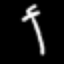

In [5]:
convert_values_to_image(training_letters_images.loc[0], True)

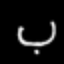

In [6]:
convert_values_to_image(training_letters_images.loc[12], True)

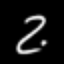

In [7]:
convert_values_to_image(training_letters_images.loc[37], True)


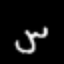

In [8]:
convert_values_to_image(training_letters_images.loc[3000], True)

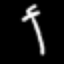

In [9]:

convert_values_to_image(training_digits_images.loc[0], True)

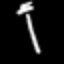

In [10]:
convert_values_to_image(training_digits_images.loc[2], True)

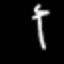

In [11]:
convert_values_to_image(training_digits_images.loc[7], True)

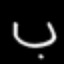

In [12]:
convert_values_to_image(training_digits_images.loc[9], True)

### Data Preprocessing

#### Image Normalization

We rescale the images by dividing every pixel in the image by 255 to make them into range [0, 1]

In [13]:
training_digits_images_scaled = training_digits_images.values.astype('float32')/255
training_digits_labels = training_digits_labels.values.astype('int32')
testing_digits_images_scaled = testing_digits_images.values.astype('float32')/255
testing_digits_labels = testing_digits_labels.values.astype('int32')

training_letters_images_scaled = training_letters_images.values.astype('float32')/255
training_letters_labels = training_letters_labels.values.astype('int32')
testing_letters_images_scaled = testing_letters_images.values.astype('float32')/255
testing_letters_labels = testing_letters_labels.values.astype('int32')

In [14]:
print("Training images of digits after scaling")
print(training_digits_images_scaled.shape)
training_digits_images_scaled[0:5]
     

Training images of digits after scaling
(13440, 4096)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
print("Training images of letters after scaling")
print(training_letters_images_scaled.shape)
training_letters_images_scaled[0:5]

Training images of letters after scaling
(13440, 4096)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Encoding Categorical Labels

In [16]:
from keras.utils import to_categorical

# one hot encoding
# number of classes = 10 (digits classes) + 28 (arabic alphabet classes)
number_of_classes = 38
training_letters_labels_encoded = to_categorical(training_letters_labels, num_classes=number_of_classes)
testing_letters_labels_encoded = to_categorical(testing_letters_labels, num_classes=number_of_classes)
training_digits_labels_encoded = to_categorical(training_digits_labels, num_classes=number_of_classes)
testing_digits_labels_encoded = to_categorical(testing_digits_labels, num_classes=number_of_classes)

In [17]:
print(training_digits_labels_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### Reshaping Input Images to 64x64x1

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape (nb_samples,rows,columns,channels)

where nb_samples corresponds to the total number of images (or samples), and rows, columns, and channels correspond to the number of rows, columns, and channels for each image, respectively.

##### So we will reshape the input images to a 4D tensor with shape (nb_samples, 64, 64 ,1) as we use grayscale images of 64x64 pixels.

In [18]:
# reshape input digit images to 64x64x1
training_digits_images_scaled = training_digits_images_scaled.reshape([-1, 64, 64, 1])
testing_digits_images_scaled = testing_digits_images_scaled.reshape([-1, 64, 64, 1])

# reshape input letter images to 64x64x1
training_letters_images_scaled = training_letters_images_scaled.reshape([-1, 64, 64, 1])
testing_letters_images_scaled = testing_letters_images_scaled.reshape([-1, 64, 64, 1])

print(training_digits_images_scaled.shape, training_digits_labels_encoded.shape, testing_digits_images_scaled.shape, testing_digits_labels_encoded.shape)
print(training_letters_images_scaled.shape, training_letters_labels_encoded.shape, testing_letters_images_scaled.shape, testing_letters_labels_encoded.shape)


(13440, 64, 64, 1) (13440, 38) (3360, 64, 64, 1) (3360, 38)
(13440, 64, 64, 1) (13440, 38) (3360, 64, 64, 1) (3360, 38)


#### Merging Letters and Digits Datasets

In [19]:
training_data_images = np.concatenate((training_digits_images_scaled, training_letters_images_scaled), axis=0) 
training_data_labels = np.concatenate((training_digits_labels_encoded, training_letters_labels_encoded), axis=0)
print("Total Training images are {} images of shape".format(training_data_images.shape[0]))
print(training_data_images.shape, training_data_labels.shape)


testing_data_images = np.concatenate((testing_digits_images_scaled, testing_letters_images_scaled), axis=0) 
testing_data_labels = np.concatenate((testing_digits_labels_encoded, testing_letters_labels_encoded), axis=0)
print("Total Testing images are {} images of shape".format(testing_data_images.shape[0]))
print(testing_data_images.shape, testing_data_labels.shape)

Total Training images are 26880 images of shape
(26880, 64, 64, 1) (26880, 38)
Total Testing images are 6720 images of shape
(6720, 64, 64, 1) (6720, 38)


#### Designing Model Architecture

Now we will make a method which creates the model architecture with the specified optimizer and activation functions.

In [20]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense

def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
  # create model
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(64, 64, 1), kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))
  model.add(GlobalAveragePooling2D())
  
  #Fully connected final layer
  model.add(Dense(38, activation='softmax'))

  # Compile model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
  return model

#### Model Summary And Visualization

In [21]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       1

Keras support plotting the model in keras.utils.vis_utils module which provides utility functions to plot a Keras model using graphviz.

To be able to use that utility we should first install pydot and graphviz modules. This can be done by running the following code cell then restart the runtime environment.

In [22]:
import pydot

Now we can plot the model and save it to a file also.

### Parameters Tuning

We will tune the parameters optimizer, kernel_initializer and activation.

In [23]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define the grid search parameters
optimizer = ['RMSprop', 'Adam', 'Adagrad', 'Nadam']
kernel_initializer = ['normal', 'uniform']
activation = ['relu', 'linear', 'tanh']

param_grid = dict(optimizer=optimizer, kernel_initializer=kernel_initializer, activation=activation)

# count number of different parameters values combinations
parameters_number = 1
for x in param_grid:
  parameters_number = parameters_number * len(param_grid[x]) 
print("Number of different parameter combinations = {}".format(parameters_number))

Number of different parameter combinations = 24


We will try different models with different parameters to find the best parameter values.

In [24]:
epochs = 5
batch_size = 20 # 20 divides the training data samples

#creating the models with different hyperparameters
for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
    print(params)
    curr_model = create_model(a, b, c)
    curr_model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1)
    print("=============================================================================")

{'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
Epoch 1/5
1344/1344 [==============================] - 59s 43ms/step - loss: 0.9536 - accuracy: 0.7323 - val_loss: 0.7329 - val_accuracy: 0.7872
Epoch 2/5
1344/1344 [==============================] - 56s 41ms/step - loss: 0.2612 - accuracy: 0.9210 - val_loss: 0.7494 - val_accuracy: 0.7836
Epoch 3/5
1344/1344 [==============================] - 55s 41ms/step - loss: 0.1848 - accuracy: 0.9442 - val_loss: 3.3347 - val_accuracy: 0.5205
Epoch 4/5
1344/1344 [==============================] - 55s 41ms/step - loss: 0.1587 - accuracy: 0.9505 - val_loss: 0.4174 - val_accuracy: 0.8723
Epoch 5/5
1344/1344 [==============================] - 56s 42ms/step - loss: 0.1405 - accuracy: 0.9553 - val_loss: 0.3621 - val_accuracy: 0.8902
{'optimizer': 'RMSprop', 'kernel_initializer': 'uniform', 'activation': 'relu'}
Epoch 1/5
1344/1344 [==============================] - 57s 41ms/step - loss: 0.7943 - accuracy: 0.7811 - val_loss: 0

Epoch 4/5
1344/1344 [==============================] - 53s 39ms/step - loss: 0.1524 - accuracy: 0.9533 - val_loss: 0.6467 - val_accuracy: 0.8369
Epoch 5/5
1344/1344 [==============================] - 53s 39ms/step - loss: 0.1364 - accuracy: 0.9590 - val_loss: 0.2468 - val_accuracy: 0.9280
{'optimizer': 'Nadam', 'kernel_initializer': 'uniform', 'activation': 'relu'}
Epoch 1/5
1344/1344 [==============================] - 65s 46ms/step - loss: 0.8594 - accuracy: 0.7723 - val_loss: 0.7070 - val_accuracy: 0.7818
Epoch 2/5
1344/1344 [==============================] - 62s 46ms/step - loss: 0.2401 - accuracy: 0.9317 - val_loss: 2.0023 - val_accuracy: 0.4155
Epoch 3/5
1344/1344 [==============================] - 62s 46ms/step - loss: 0.1726 - accuracy: 0.9481 - val_loss: 0.4576 - val_accuracy: 0.8735
Epoch 4/5
1344/1344 [==============================] - 62s 46ms/step - loss: 0.1468 - accuracy: 0.9541 - val_loss: 1.4532 - val_accuracy: 0.6423
Epoch 5/5
1344/1344 [==============================]

##### From the above results we can see that best parameters are:

##### Optimizer: Adam

##### Kernel_initializer: uniform

##### Activation: relu

Let's create the model with the best parameters obtained.

In [25]:
model = create_model(optimizer='Adam', kernel_initializer='uniform', activation='relu')

## Training the Model

### Fitting the Model

Train the model using batch_size=20 to reduce used memory and make the training more quick. We will train the model first on 10 epochs to see the accuracy that we will obtain.

In [26]:
from keras.callbacks import ModelCheckpoint  

# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=10, batch_size=20, verbose=1, callbacks=[checkpointer])

Epoch 1/10
1343/1344 [============================>.] - ETA: 0s - loss: 0.8539 - accuracy: 0.7750
Epoch 1: val_loss improved from inf to 1.02074, saving model to weights.hdf5
1344/1344 [==============================] - 65s 47ms/step - loss: 0.8535 - accuracy: 0.7751 - val_loss: 1.0207 - val_accuracy: 0.8560
Epoch 2/10
1344/1344 [==============================] - ETA: 0s - loss: 0.2355 - accuracy: 0.9340
Epoch 2: val_loss improved from 1.02074 to 0.86258, saving model to weights.hdf5
1344/1344 [==============================] - 62s 46ms/step - loss: 0.2355 - accuracy: 0.9340 - val_loss: 0.8626 - val_accuracy: 0.8646
Epoch 3/10
1343/1344 [============================>.] - ETA: 0s - loss: 0.1715 - accuracy: 0.9484
Epoch 3: val_loss improved from 0.86258 to 0.19431, saving model to weights.hdf5
1344/1344 [==============================] - 62s 46ms/step - loss: 0.1716 - accuracy: 0.9483 - val_loss: 0.1943 - val_accuracy: 0.9408
Epoch 4/10
1344/1344 [==============================] - ETA: 0

### Plotting Loss and Accuracy Curves with Epochs

In [27]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
  # Loss Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  # Accuracy Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'],'r',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16) 

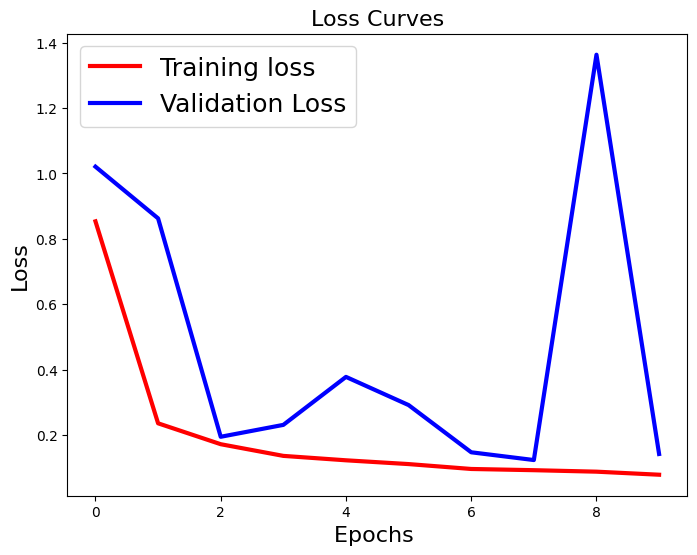

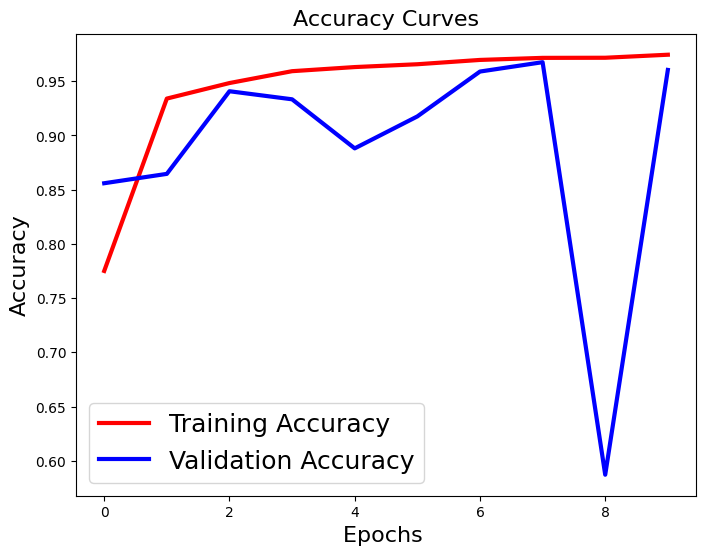

In [28]:
plot_loss_accuracy(history)

### Load the Model with the Best Validation Loss

In [29]:
model.load_weights('weights.hdf5')

### Test the Model

In [30]:
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

210/210 [==============================] - 4s 16ms/step - loss: 0.1231 - accuracy: 0.9676
Test Accuracy: 0.9675595164299011
Test Loss: 0.12312395125627518


##### We get test accuracy of 96.76% after training on 10 epochs only.

### Training More on the best model

Epoch 1/20
1344/1344 [==============================] - ETA: 0s - loss: 0.0914 - accuracy: 0.9700
Epoch 1: val_loss improved from inf to 0.11957, saving model to weights.hdf5
1344/1344 [==============================] - 67s 50ms/step - loss: 0.0914 - accuracy: 0.9700 - val_loss: 0.1196 - val_accuracy: 0.9664
Epoch 2/20
1344/1344 [==============================] - ETA: 0s - loss: 0.0769 - accuracy: 0.9744
Epoch 2: val_loss did not improve from 0.11957
1344/1344 [==============================] - 62s 46ms/step - loss: 0.0769 - accuracy: 0.9744 - val_loss: 1.2704 - val_accuracy: 0.6741
Epoch 3/20
1344/1344 [==============================] - ETA: 0s - loss: 0.0730 - accuracy: 0.9766
Epoch 3: val_loss did not improve from 0.11957
1344/1344 [==============================] - 62s 46ms/step - loss: 0.0730 - accuracy: 0.9766 - val_loss: 0.1269 - val_accuracy: 0.9693
Epoch 4/20
1344/1344 [==============================] - ETA: 0s - loss: 0.0669 - accuracy: 0.9788
Epoch 4: val_loss did not improv

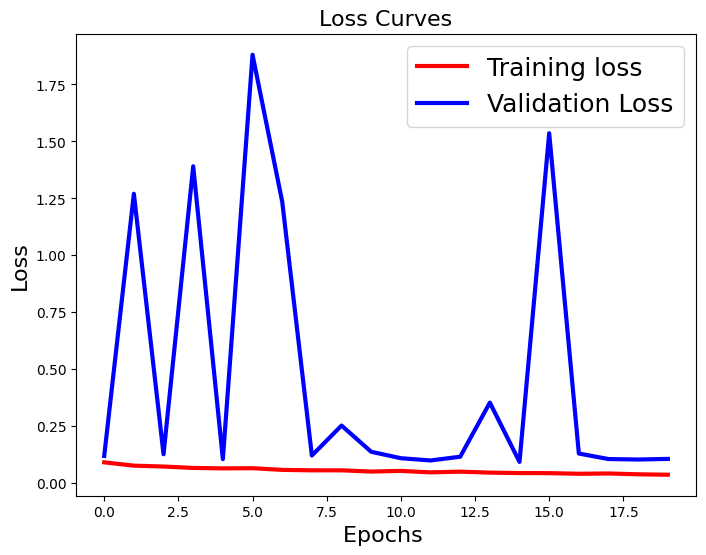

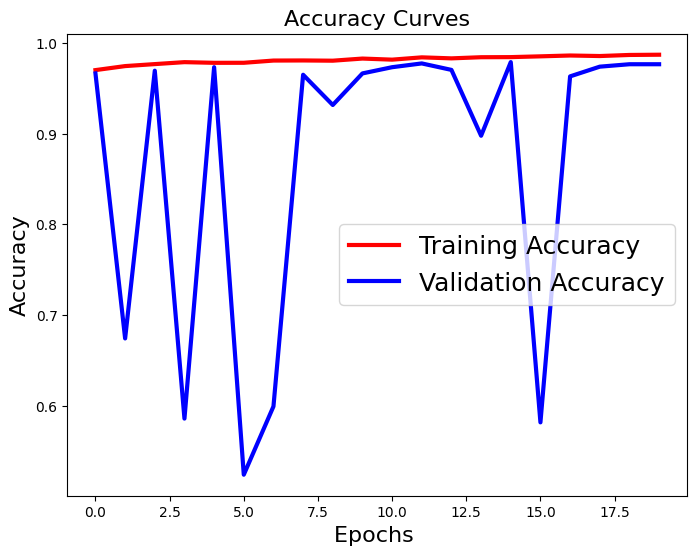

In [31]:
epochs = 20
batch_size = 20

checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)

history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])
          
model.load_weights('weights.hdf5')

plot_loss_accuracy(history)


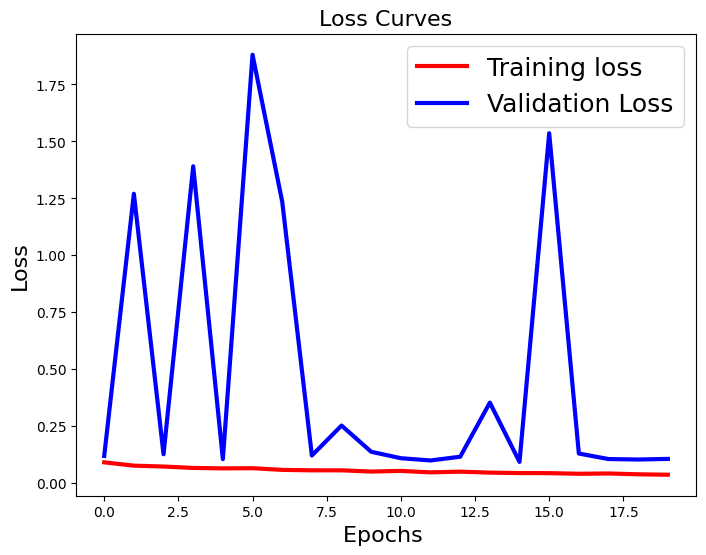

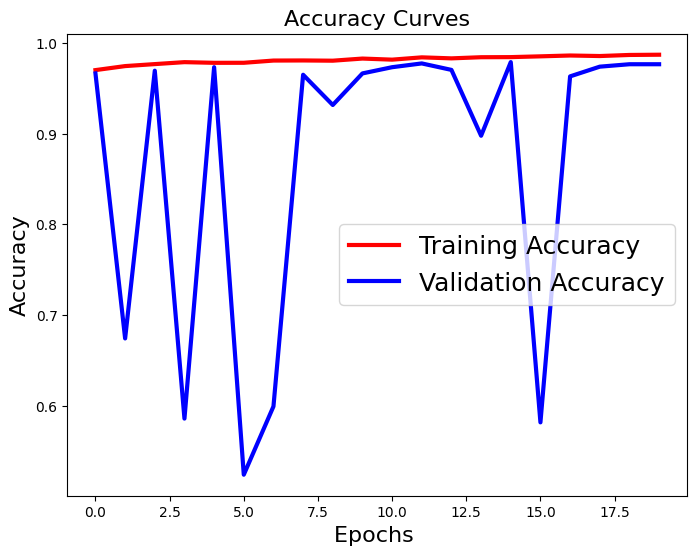

In [32]:
plot_loss_accuracy(history)

### Testing the Model again

In [33]:
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

210/210 [==============================] - 4s 18ms/step - loss: 0.0932 - accuracy: 0.9789
Test Accuracy: 0.9788690209388733
Test Loss: 0.09324000030755997


After training the model on more epochs we gained a better model which can classify complex patterns . So when we tested it on our test dataset we had better results than before.

##### Test accuracy is improved from 96.76% to 97.89% As we train the model on 20 more epochs.

### Saving the Final Model

Let's save the model on json format to be used later instead of creating the model again from scratch.

In [34]:
from keras.models import model_from_json

In [35]:
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

Save the model weights to file.

In [36]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [37]:
# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_json = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# compile the loaded model
loaded_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

Loaded model from disk


### Benchmark Model

In [38]:
baseline_model = Sequential()
baseline_model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(64, 64, 1), activation='relu')) # Input layer
baseline_model.add(GlobalAveragePooling2D())
baseline_model.add(Dense(38, activation = 'softmax')) # Output layer => output dimension = 38 as it is multi-class

# Compile the baseline model
baseline_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')

# Fit the baseline model with training dataset
epochs = 5
batch_size = 20

baseline_model.fit(training_data_images, training_data_labels, 
                  validation_data=(testing_data_images, testing_data_labels),
                  epochs=epochs, batch_size=batch_size, verbose=1)

# Test the baseline model
baseline_metrics = baseline_model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Baseline Model Test Accuracy: {}".format(baseline_metrics[1]))
print("Baseline Model Test Loss: {}".format(baseline_metrics[0]))


Epoch 1/5
1344/1344 [==============================] - 10s 7ms/step - loss: 3.3616 - accuracy: 0.0382 - val_loss: 3.2807 - val_accuracy: 0.0661
Epoch 2/5
1344/1344 [==============================] - 10s 8ms/step - loss: 3.2312 - accuracy: 0.0654 - val_loss: 3.1746 - val_accuracy: 0.0818
Epoch 3/5
1344/1344 [==============================] - 12s 9ms/step - loss: 3.1391 - accuracy: 0.0744 - val_loss: 3.0998 - val_accuracy: 0.0783
Epoch 4/5
1344/1344 [==============================] - 10s 8ms/step - loss: 3.0883 - accuracy: 0.0758 - val_loss: 3.0620 - val_accuracy: 0.0851
Epoch 5/5
210/210 [==============================] - 1s 4ms/step - loss: 3.0450 - accuracy: 0.0830
Baseline Model Test Accuracy: 0.08303571492433548
Baseline Model Test Loss: 3.044992685317993


### Predict Image Classes

In [39]:
def get_predicted_classes(model, data, labels=None):
  image_predictions = model.predict(data)
  predicted_classes = np.argmax(image_predictions, axis=1)
  true_classes = np.argmax(labels, axis=1)
  return predicted_classes, true_classes

#### Comparing Evaluation Metrics between Benchmark Model and Final Model

Making a method which will print all metrics (precision, recall, f1-score and support) with each class in the dataset.

In [40]:
from sklearn.metrics import classification_report

def get_classification_report(y_true, y_pred):
  print(classification_report(y_true, y_pred))

#### Evaluating Final Model using the specified metrics

In [41]:
y_pred, y_true = get_predicted_classes(model, testing_data_images, testing_data_labels)
get_classification_report(y_true, y_pred)

210/210 [==============================] - 3s 15ms/step
              precision    recall  f1-score   support

          10       0.99      1.00      1.00       240
          11       1.00      0.99      1.00       240
          12       0.94      0.97      0.96       240
          13       1.00      0.97      0.98       240
          14       0.99      1.00      1.00       240
          15       0.98      0.99      0.99       240
          16       1.00      0.99      1.00       240
          17       0.97      0.99      0.98       240
          18       0.94      0.94      0.94       240
          19       0.96      1.00      0.98       240
          20       0.96      0.91      0.94       240
          21       1.00      1.00      1.00       240
          22       0.98      0.99      0.99       240
          23       0.97      1.00      0.98       240
          24       1.00      0.94      0.97       240
          25       0.94      0.99      0.97       240
          26       1.00  

#### Evaluating Baseline (Benchmark) Model using the specified metrics

In [42]:
y_pred, y_true = get_predicted_classes(baseline_model, testing_data_images, testing_data_labels)
get_classification_report(y_true, y_pred)

210/210 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

          10       0.08      0.23      0.11       240
          11       0.00      0.00      0.00       240
          12       0.00      0.00      0.00       240
          13       0.00      0.00      0.00       240
          14       0.00      0.00      0.00       240
          15       0.00      0.00      0.00       240
          16       0.00      0.00      0.00       240
          17       0.20      0.74      0.32       240
          18       0.00      0.00      0.00       240
          19       0.00      0.00      0.00       240
          20       0.07      0.13      0.10       240
          21       0.00      0.00      0.00       240
          22       0.00      0.00      0.00       240
          23       0.00      0.00      0.00       240
          24       0.09      0.07      0.08       240
          25       0.00      0.00      0.00       240
          26       0.00   

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [43]:
def get_non_zero_index_from_one_hot_encoding(one_hot_encoding):
  non_zero_index = np.where(one_hot_encoding == 1)[0]
  assert(len(non_zero_index) == 1)
  non_zero_index = non_zero_index[0]
  return non_zero_index

In [44]:

def convert_categorical_label_to_real_label(categorical_label):
  real_labels = []
  real_labels.extend([x for x in range(10)])
  real_labels.extend(['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ى'])
  return real_labels[categorical_label]
     

In [45]:
def show_example(sample_index):
  y_pred, y_true = get_predicted_classes(model, testing_data_images[[sample_index]], testing_data_labels[[sample_index]])
  non_zero_index = get_non_zero_index_from_one_hot_encoding(testing_data_labels[sample_index])
  y_true = y_true[0]
  y_pred = y_pred[0]
  assert y_true == non_zero_index
  true_label = convert_categorical_label_to_real_label(y_true)
  predicted_label = convert_categorical_label_to_real_label(y_pred)
  print("The following image has the written character '{}' but the model predicted it as '{}'".format(true_label, predicted_label))
  return true_label == predicted_label

1/1 [==============================] - 0s 86ms/step
The following image has the written character 'ت' but the model predicted it as 'ت'


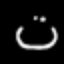

In [46]:
sample_index = 5
show_example(sample_index)
convert_values_to_image(testing_digits_images.loc[sample_index], True)

1/1 [==============================] - 0s 29ms/step
The following image has the written character 'ى' but the model predicted it as 'ى'


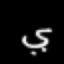

In [56]:
sample_index =6719
show_example(sample_index)
convert_values_to_image(testing_letters_images.loc[sample_index - testing_digits_images.shape[0]], True) 

1/1 [==============================] - 0s 38ms/step
The following image has the written character 'غ' but the model predicted it as 'غ'


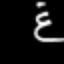

In [57]:
sample_index =6700
show_example(sample_index)
convert_values_to_image(testing_letters_images.loc[sample_index - testing_digits_images.shape[0]], True) 

## Conclusion

##### We built a CNN model which can classify the arabic handwritten images into digits and letters. We tested the model on more than 13000 image with all possible classes and got very high accuracy of 97.88%.